In [ ]:

import kagglehub
kritikseth_fruit_and_vegetable_image_recognition_path = kagglehub.dataset_download('kritikseth/fruit-and-vegetable-image-recognition')

print('Data source import complete.')


100%|██████████| 1.98G/1.98G [00:32<00:00, 65.2MB/s]

Extracting files...


Data source import complete.


In [ ]:
# %%
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# Use the downloaded dataset path to construct the directories
train_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'train'
test_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'test'
val_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'validation'


# Create a list with the filepaths for training and testing
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('../input/fruit-and-vegetable-image-recognition/test') # This path might still be incorrect if the data is within the downloaded hub path
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation') # This path might still be incorrect if the data is within the downloaded hub path
val_filepaths = list(test_dir.glob(r'**/*.jpg')) # This is using test_dir again, likely incorrect.

# Correct paths for test and validation directories
test_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'test'
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'validation'
val_filepaths = list(val_dir.glob(r'**/*.jpg')) # Use val_dir here

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['chilli pepper' 'pineapple' 'pear' 'jalepeno' 'carrot' 'beetroot'
 'watermelon' 'bell pepper' 'lemon' 'peas' 'cauliflower' 'potato'
 'lettuce' 'sweetcorn' 'turnip' 'grapes' 'onion' 'tomato' 'kiwi' 'spinach'
 'cucumber' 'corn' 'ginger' 'garlic' 'capsicum' 'cabbage' 'sweetpotato'
 'orange' 'raddish' 'banana' 'soy beans' 'paprika' 'apple' 'eggplant'
 'mango' 'pomegranate']


In [ ]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

Filepath          Label
0  /root/.cache/kagglehub/datasets/kritikseth/fru...  chilli pepper
1  /root/.cache/kagglehub/datasets/kritikseth/fru...      pineapple
2  /root/.cache/kagglehub/datasets/kritikseth/fru...           pear
3  /root/.cache/kagglehub/datasets/kritikseth/fru...       jalepeno
4  /root/.cache/kagglehub/datasets/kritikseth/fru...         carrot

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Filepath').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Label'].value_counts()
    for x_label, grp in _df_2.groupby('Filepath')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Filepath')
_ = plt.ylabel('Label')

NameError: name 'X_test' is not defined

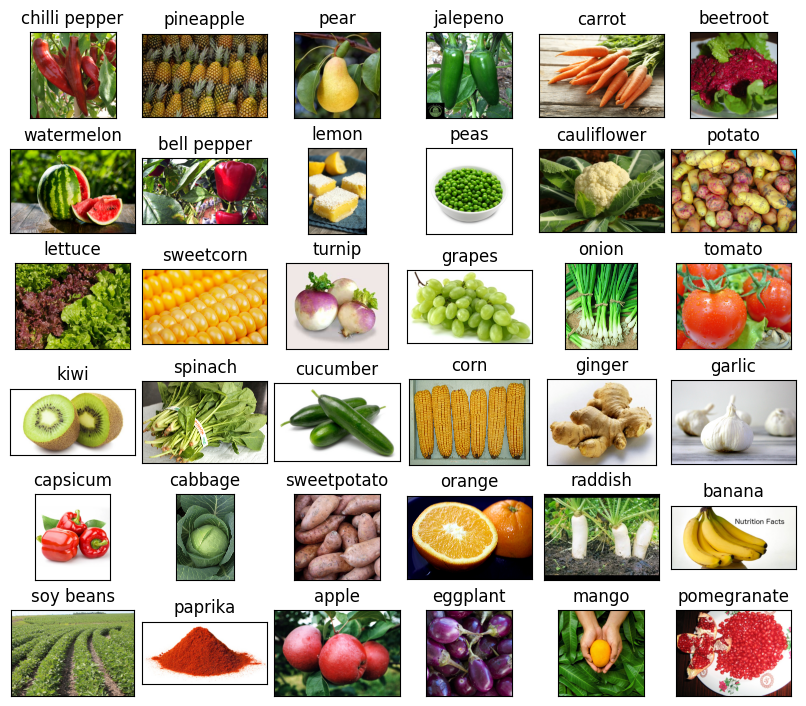

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Train the model<a class="anchor" id="3"></a>

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.3570 - loss: 2.5826 - val_accuracy: 0.8563 - val_loss: 0.4662
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8236 - loss: 0.5775 - val_accuracy: 0.8952 - val_loss: 0.3516
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8853 - loss: 0.3717 - val_accuracy: 0.9311 - val_loss: 0.2046
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9260 - loss: 0.2316 - val_accuracy: 0.9371 - val_loss: 0.2084
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9585 - loss: 0.1383 - val_accuracy: 0.9341 - val_loss: 0.1769


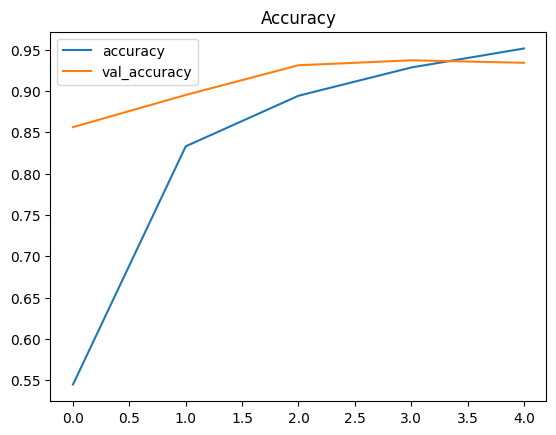

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

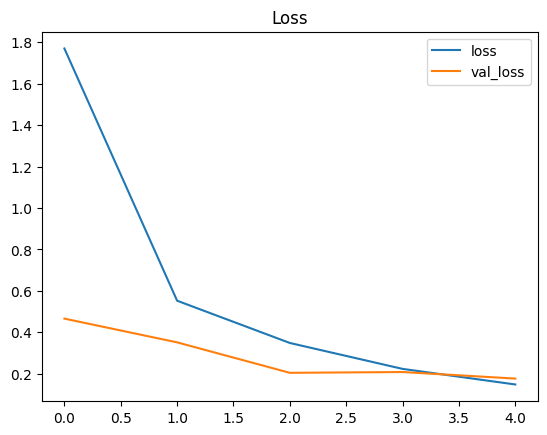

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# 4. Visualize the result<a class="anchor" id="4"></a>

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 93.41%


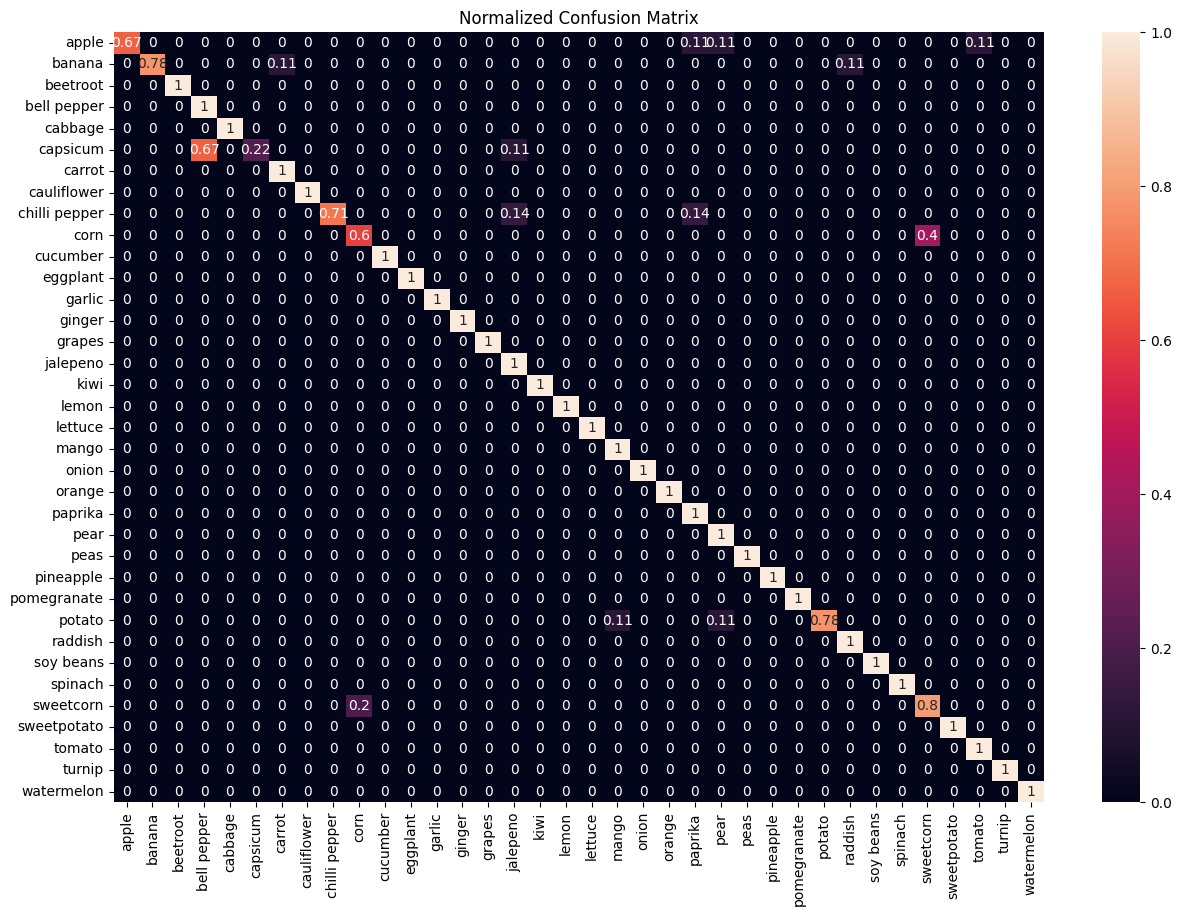

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            annot=True,
            xticklabels = sorted(set(y_test)),
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

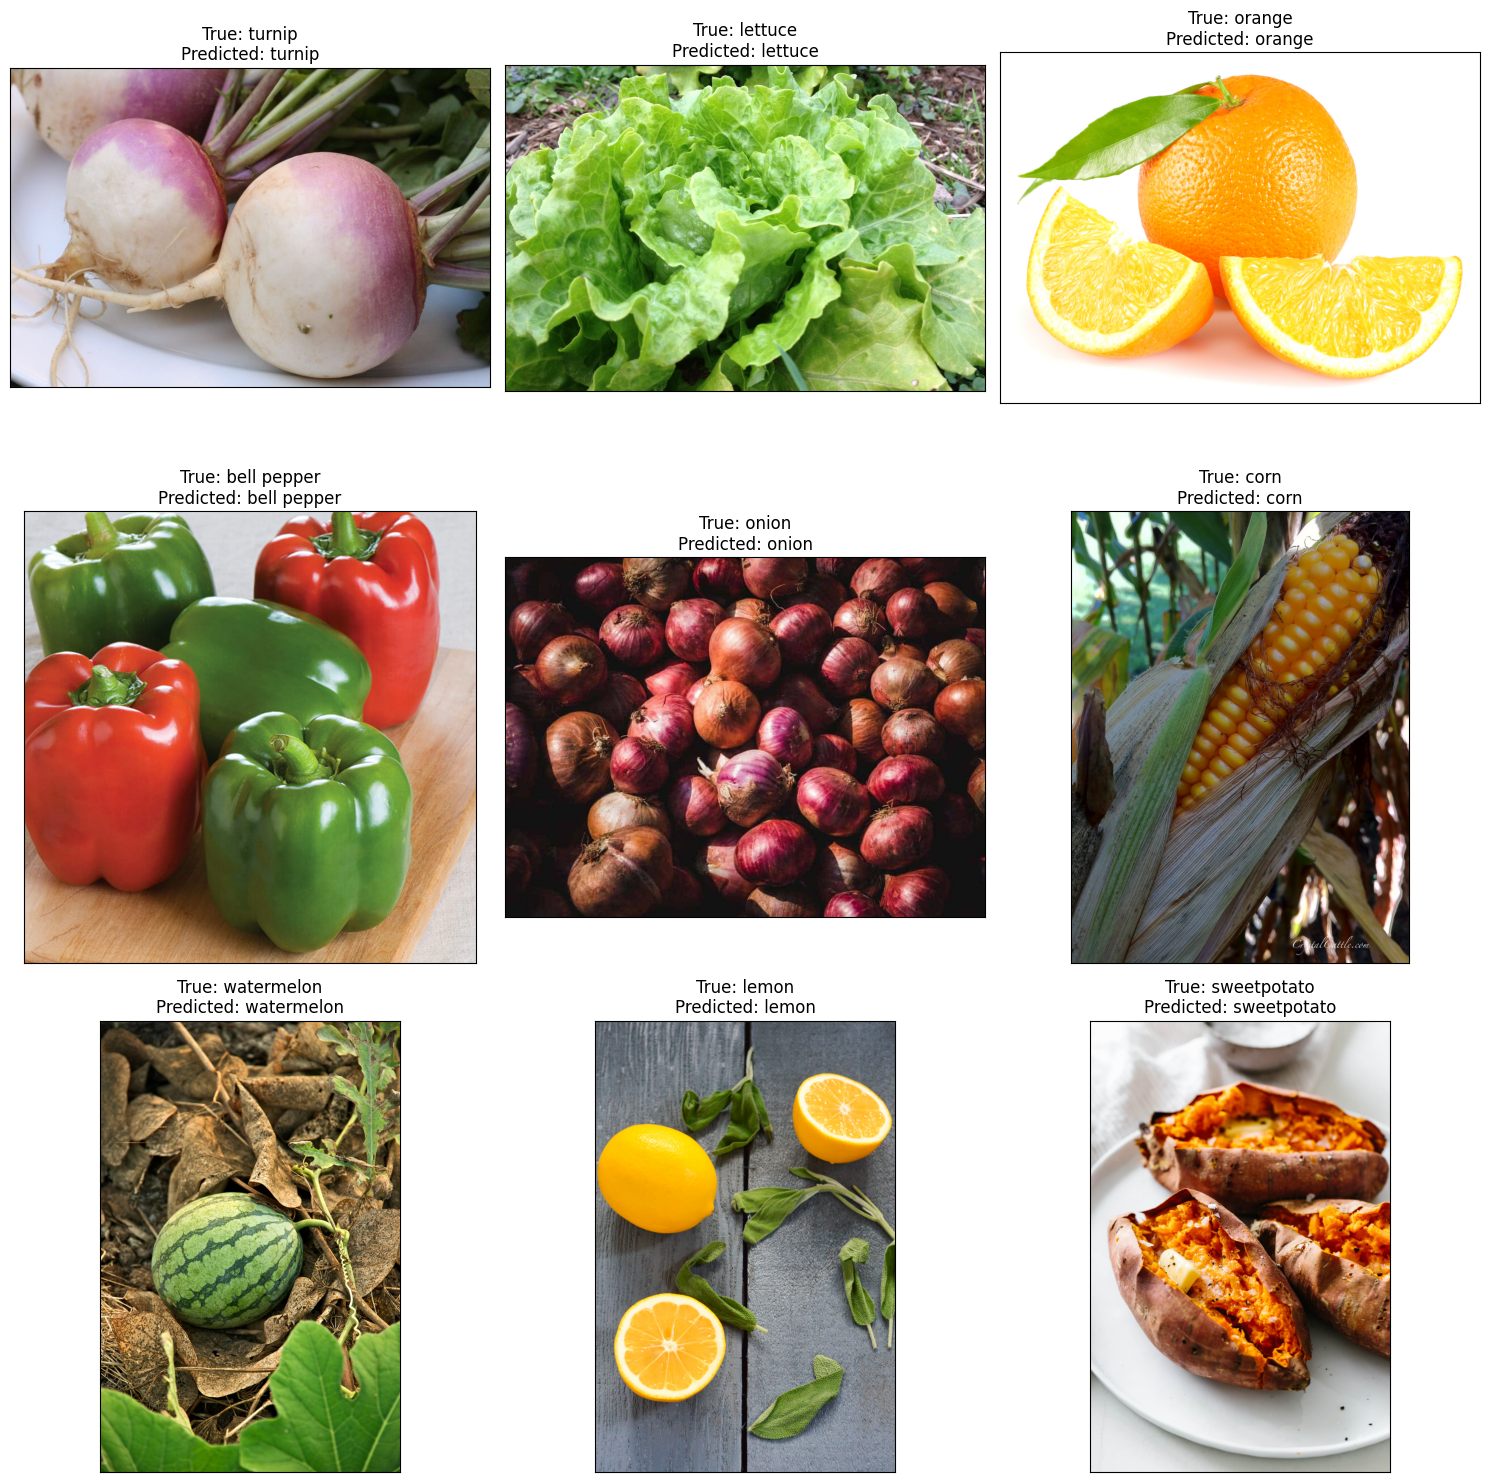

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Grad-CAM class activation visualization
*Code adapted from keras.io*

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display

# --- Fungsi untuk mengubah gambar jadi array (batch 1) ---
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)  # tambahkan dimensi batch
    return array

# --- Fungsi utama Grad-CAM ---
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Model grad-CAM: input -> conv layer + output
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Hitung gradien kelas terhadap output conv layer
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Gradien terhadap output fitur conv
    grads = tape.gradient(class_channel, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # channel importance

    # Buat heatmap
    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalisasi heatmap ke rentang 0 - 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# --- Fungsi untuk menggabungkan heatmap ke gambar asli ---
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load gambar asli
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Konversi heatmap ke uint8 (0-255)
    heatmap = np.uint8(255 * heatmap)

    # Colormap: JET
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Resize heatmap ke ukuran gambar asli
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Gabungkan heatmap dengan gambar
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Simpan hasil
    superimposed_img.save(cam_path)

    # Tampilkan
    display(Image(cam_path))
    return cam_path

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Muat model dengan bobot ImageNet
model = MobileNetV2(weights='imagenet', include_top=True)
last_conv_layer_name = "Conv_1"
img_size = (224, 224)



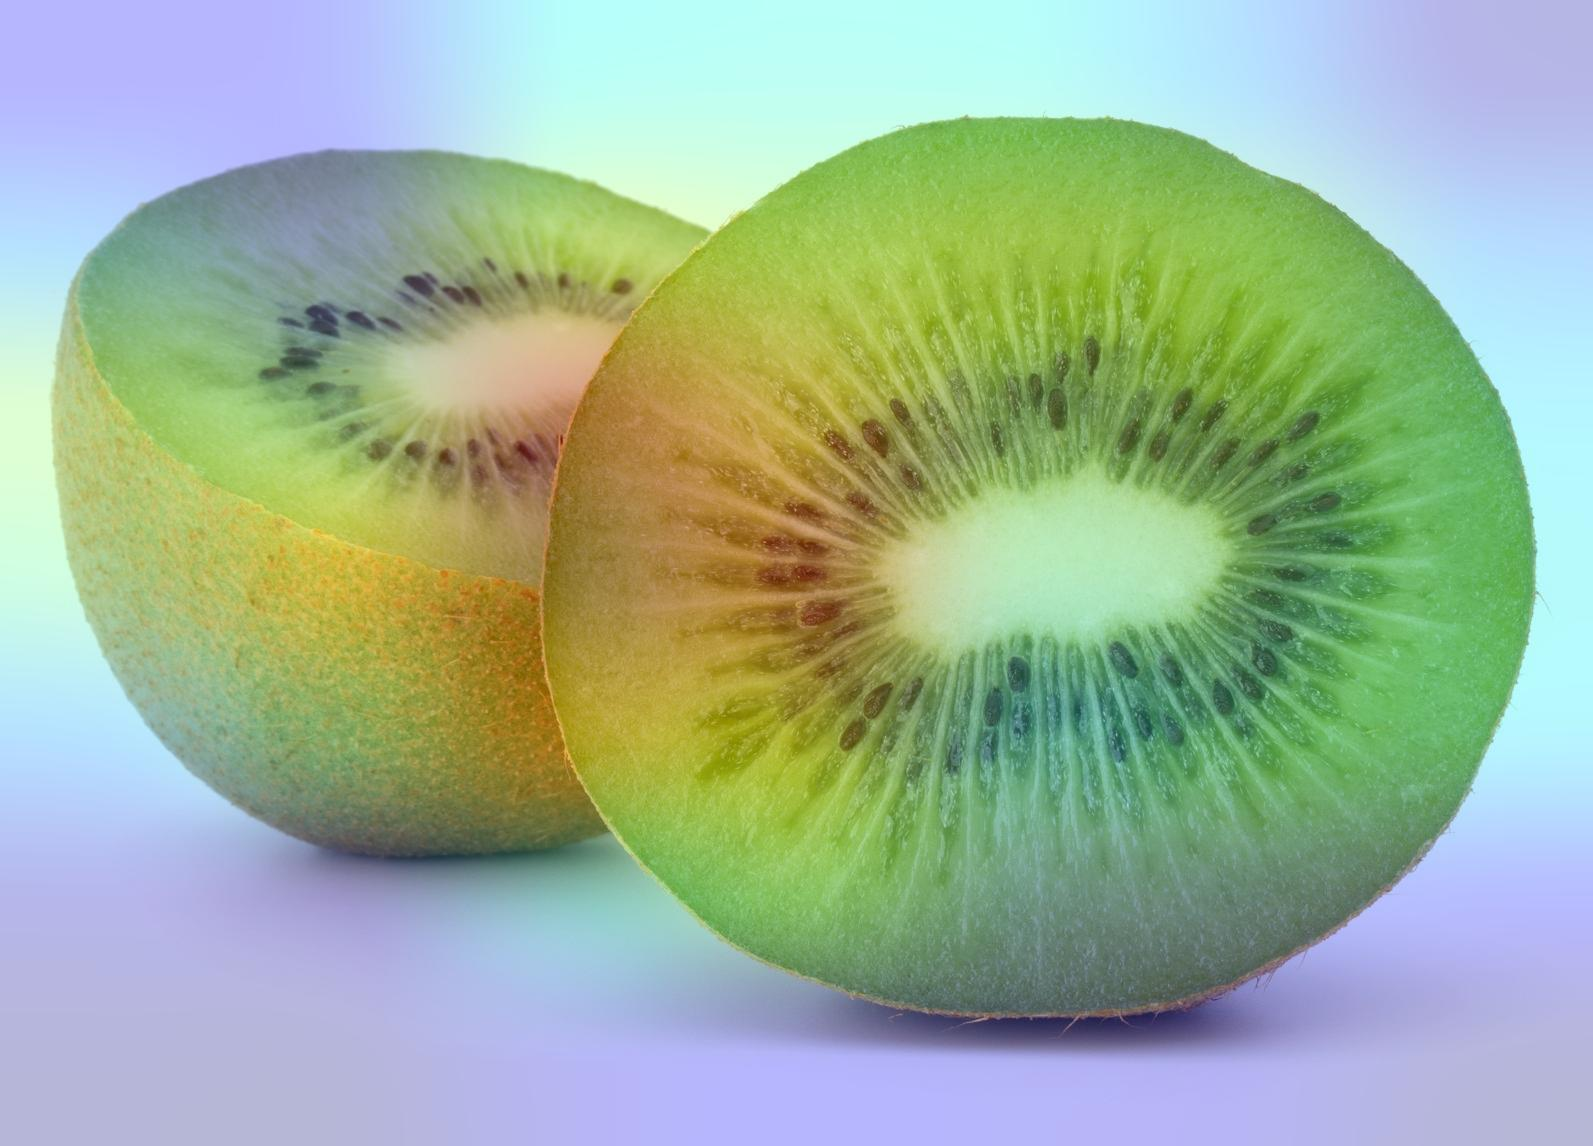

'gradcam_output.jpg'

In [ ]:
# Pilih 1 gambar dari dataset
img_path = train_df.Filepath.iloc[799]

# Ubah jadi array dan preprocess
img_array = get_img_array(img_path, size=img_size)
img_array = preprocess_input(img_array)

# Buat heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Simpan dan tampilkan hasil Grad-CAM
save_and_display_gradcam(img_path, heatmap, cam_path="gradcam_output.jpg")


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Misal hasil label asli dan prediksi model
# y_true = ['carrot', 'carrot', 'pear', 'pineapple', 'carrot']
# y_pred = ['carrot', 'pear', 'pear', 'pineapple', 'carrot']

# Buat classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Ubah ke DataFrame agar jadi tabel
report_df = pd.DataFrame(report).transpose()

# Tampilkan tabel akurasi per kelas
print(report_df)


NameError: name 'y_true' is not defined